In [1]:
import pandas as pd
import numpy as np
!pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Read in data

In [2]:
data = pd.read_csv("final_data.csv")
data['la_name'] = pd.Categorical(data['la_name'])
data['reporting_year'] = data['reporting_year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Unnamed: 0                     750 non-null    int64   
 1   la_code                        750 non-null    object  
 2   reporting_year                 750 non-null    int64   
 3   academic_year                  750 non-null    float64 
 4   region_code                    750 non-null    object  
 5   region_name                    750 non-null    object  
 6   la_name                        750 non-null    category
 7   pt_ks2_expectations            229 non-null    float64 
 8   pt_ks4_expectations            469 non-null    float64 
 9   avg_p8score                    431 non-null    float64 
 10  num_convictions                482 non-null    float64 
 11  num_placed_inside_la           747 non-null    float64 
 12  pt_convictions                 482 n

# Setting categorical columns

In [3]:
data['ofsted_overall'] =data['ofsted_overall'].astype("category")
data['ofsted_overall_filled'] =data['ofsted_overall_filled'].astype("category")
data['ofsted_care'] =data['ofsted_care'].astype("category")
data['ofsted_care_filled'] =data['ofsted_care_filled'].astype("category")
data['ofsted_leaders'] =data['ofsted_leaders'].astype("category")
data['ofsted_leaders_filled'] =data['ofsted_leaders_filled'].astype("category")
data['ofsted_help_protection'] =data['ofsted_help_protection'].astype("category")
data['ofsted_help_protection_filled'] =data['ofsted_help_protection_filled'].astype("category")

In [4]:
# train and testing data
datatrain, datatest = train_test_split(data, test_size = 0.25, random_state = 7, stratify=data['la_name'])
datatrain.describe()


,Unnamed: 0,reporting_year,academic_year,pt_ks2_expectations,pt_ks4_expectations,avg_p8score,num_convictions,num_placed_inside_la,pt_convictions,pt_placed_inside_la,...,pt_placed_inside_la_filled,pt_substance_filled,pt_private_provis_filled,pt_3_more_placemts_filled,pt_ks2_expectations_filled,pt_ks4_expectations_filled,avg_p8score_filled,per_child_spend,cla_budget_filled,budget_per_child
count,562.000000,562.000000,562.000000,166.000000,351.000000,314.000000,361.000000,560.000000,361.000000,560.000000,...,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,379.578292,2019.973310,201917.304270,37.874987,26.009800,-1.296116,10.188366,301.817857,3.612188,53.191439,...,53.080437,3.734959,36.913172,10.378809,39.282077,25.332024,-1.295800,60.695150,30425.316594,60.695150
std,214.161862,1.394284,140.822684,9.823447,8.878642,0.387250,7.159530,253.210772,2.366260,16.354665,...,16.431430,3.742844,13.898564,3.010638,8.708374,7.650746,0.295429,18.779540,21392.339253,18.779540
min,0.000000,2018.000000,201718.000000,18.000000,0.000000,-2.390000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.604167,0.000000,18.000000,0.000000,-2.390000,14.950000,299.000000,14.950000
25%,198.250000,2019.000000,201819.000000,31.000000,20.500000,-1.530000,6.000000,132.000000,2.000000,42.000000,...,42.000000,0.911176,28.000000,8.000000,33.708333,21.116531,-1.418889,46.628963,17209.750000,46.628963
50%,379.000000,2020.000000,201920.000000,37.000000,24.300000,-1.325000,10.000000,230.000000,4.000000,54.000000,...,54.000000,3.000000,37.500000,10.000000,37.222222,24.100000,-1.326852,58.719902,25079.000000,58.719902
75%,564.750000,2021.000000,202021.000000,43.000000,30.900000,-1.040000,13.000000,376.000000,5.000000,65.000000,...,65.000000,5.000000,46.000000,12.000000,43.772727,29.350000,-1.167333,71.297126,35930.366914,71.297126
max,749.000000,2022.000000,202122.000000,75.000000,57.100000,-0.210000,52.000000,1665.000000,15.000000,87.000000,...,87.000000,31.000000,95.000000,30.000000,75.000000,57.100000,-0.210000,156.514851,143742.000000,156.514851


This link has a good explanation of random intercept models: https://www.bristol.ac.uk/cmm/learning/videos/random-intercepts.html

In [5]:
#very all LAs are represented in both test and training data
datatrain.la_name.unique().size, datatest.la_name.unique().size

(150, 150)

# Random intercept models - full predictors with each outcome based on grouping structure defined by la_name

$ Y_{ij} = \beta_0 + \beta_1 \cdot \text{{reporting_year}}_{ij} + \beta_2 \cdot \text{{ofsted_overall}}_{ij} + \beta_3 \cdot \text{{cla_budget}}_{ij} + \beta_4 \cdot \text{{pt_private_provis}}_{ij} + \beta_5 \cdot \text{{pt_3_more_placemts}}_{ij} + \beta_6 \cdot \text{{pt_placed_inside_la}}_{ij} + u_{j} + \varepsilon_{ij} $

$Y_{ij}$ here is the ith observation in group j (which corresponds to LA j in this case). We have standard linear model formula as follows, with $u_j$ giving us that random intercept for each LA.

We assume $u_j \text{ is } N(0, \sigma_u ^2)$, and its the variance of these random intercepts which get modelled here.

Random intercept model (one for each LA) that predicts pt_ks4_expectations based on other variables

In [6]:
model = smf.mixedlm("pt_ks4_expectations_filled ~  (ofsted_care_filled+ofsted_help_protection_filled+number_in_care_filled+per_child_spend+reporting_year+ofsted_overall_filled + pt_private_provis_filled +pt_placed_inside_la_filled +ofsted_leaders_filled  + pt_3_more_placemts_filled )", data, groups = data['la_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Mixed Linear Model Regression Results
========================================================================================
Model:                  MixedLM      Dependent Variable:      pt_ks4_expectations_filled
No. Observations:       750          Method:                  REML                      
No. Groups:             150          Scale:                   42.4150                   
Min. group size:        5            Log-Likelihood:          -2477.7389                
Max. group size:        5            Converged:               Yes                       
Mean group size:        5.0                                                             
----------------------------------------------------------------------------------------
                                       Coef.   Std.Err.   z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------------------------
Intercept                            -3160.238  368.957 -8.565 0.000 -3883.381 -2437.096
ofsted_care_filled[T.2.0]                0.051    2.057  0.025 0.980    -3.981     4.084
ofsted_care_filled[T.3.0]               -0.444    2.286 -0.194 0.846    -4.925     4.038
ofsted_care_filled[T.4.0]               -1.589    2.576 -0.617 0.537    -6.638     3.459
ofsted_help_protection_filled[T.2.0]     0.585    2.688  0.218 0.828    -4.682     5.853
ofsted_help_protection_filled[T.3.0]     1.722    2.867  0.601 0.548    -3.898     7.342
ofsted_help_protection_filled[T.4.0]    -1.109    3.125 -0.355 0.723    -7.234     5.015
ofsted_overall_filled[T.2.0]            -0.665    3.392 -0.196 0.845    -7.313     5.983
ofsted_overall_filled[T.3.0]             3.489    3.805  0.917 0.359    -3.969    10.946
ofsted_overall_filled[T.4.0]             7.133    4.179  1.707 0.088    -1.058    15.324
ofsted_leaders_filled[T.2.0]             0.663    1.940  0.342 0.733    -3.140     4.466
ofsted_leaders_filled[T.3.0]            -3.942    2.330 -1.692 0.091    -8.509     0.625
ofsted_leaders_filled[T.4.0]            -4.952    2.599 -1.905 0.057   -10.045     0.142
number_in_care_filled                   -0.004    0.001 -4.517 0.000    -0.006    -0.002
per_child_spend                         -0.006    0.017 -0.382 0.703    -0.039     0.026
reporting_year                           1.578    0.183  8.635 0.000     1.220     1.936
pt_private_provis_filled                 0.071    0.027  2.662 0.008     0.019     0.123
pt_placed_inside_la_filled               0.000    0.024  0.003 0.997    -0.046     0.046
pt_3_more_placemts_filled               -0.262    0.083 -3.144 0.002    -0.425    -0.099
Group Var                                1.556    0.210                                 
========================================================================================

"""

AIC: 4995.477721622912, MSE:  29.90, RMSE: 5.467909387983431, RMSE / std dev.: 0.8958963600550295


<ipython-input-7-fda8a907734a>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


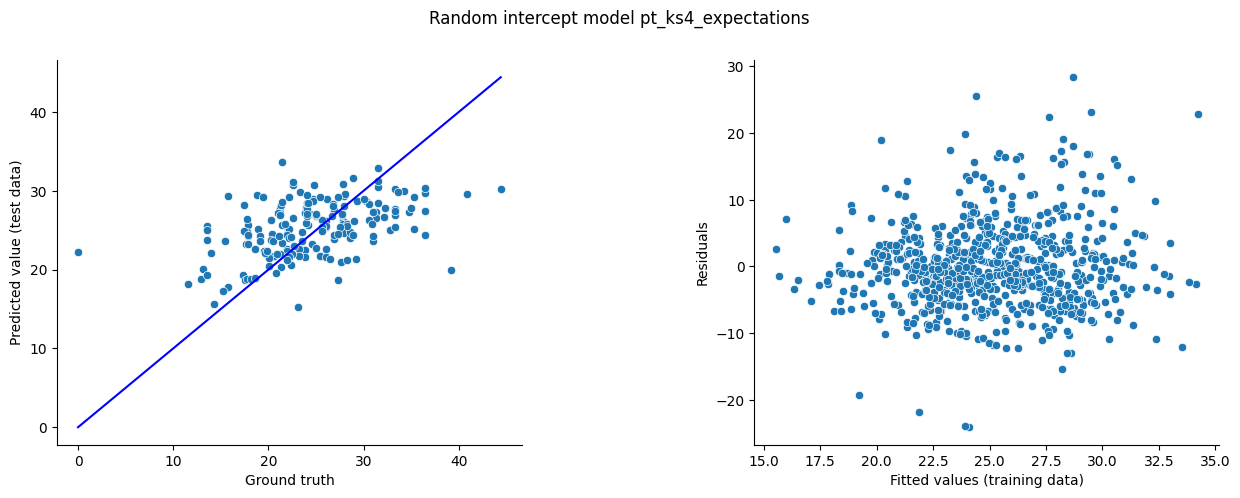

In [7]:
#fit the test values and compute evaluation metrics
predicted_vals = modelfit.predict(datatest)
#mse
mse = ((predicted_vals - datatest['pt_ks4_expectations_filled'])**2).mean()

#aic
aic = -2 * modelfit.llf + 2 * modelfit.df_modelwc
print(f"AIC: {aic}, MSE: {mse: .2f}, RMSE: {np.sqrt(mse)}, RMSE / std dev.: {np.sqrt(mse) / np.std(datatest['pt_ks4_expectations_filled'])}")

#visualise test performance and residuals
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5), gridspec_kw={'wspace': 0.5})
sns.scatterplot(x = datatest['pt_ks4_expectations_filled'], y = predicted_vals, ax = axes[0])
min_val = datatest['pt_ks4_expectations_filled'].min()
max_val = datatest['pt_ks4_expectations_filled'].max()
axes[0].set_xlabel("Ground truth")
axes[0].set_ylabel("Predicted value (test data)")
axes[0].plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='-')

sns.despine()

sns.scatterplot(y = modelfit.resid, x = modelfit.fittedvalues, ax = axes[1])
sns.despine()
axes[1].set_ylabel("Residuals")
axes[1].set_xlabel("Fitted values (training data)")
fig.suptitle("Random intercept model pt_ks4_expectations")
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


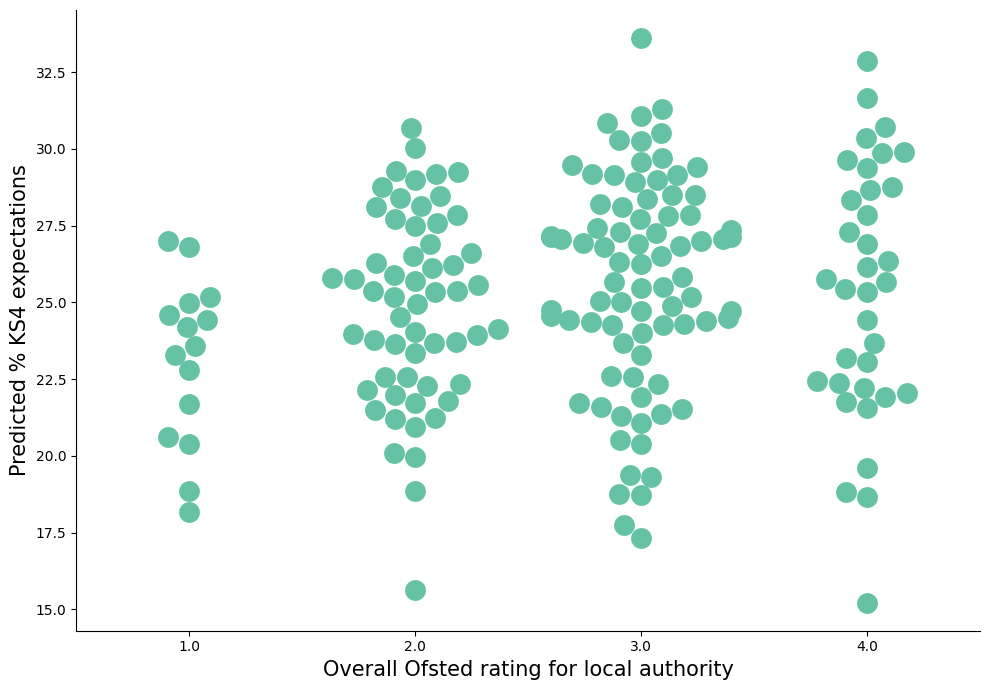

In [8]:
sns.set_palette("Set2")
plt.figure(figsize = (10,7))
sns.swarmplot(x = datatest.ofsted_overall_filled, y = predicted_vals, size = 15)
sns.despine()

plt.xlabel("Overall Ofsted rating for local authority", fontsize = 15)
plt.ylabel("Predicted % KS4 expectations", fontsize = 15)
plt.tight_layout()


Random intercept model (one for each LA) that models pt_ks2_expectations against other variables

In [9]:
model = smf.mixedlm("pt_ks2_expectations_filled ~ pt_private_provis_filled + pt_placed_inside_la_filled + number_in_care_filled + per_child_spend +reporting_year +ofsted_overall_filled+ ofsted_leaders_filled +ofsted_care_filled+ pt_3_more_placemts_filled+ofsted_help_protection_filled", data, groups = data['la_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()



<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
====================================================================================
Model:                MixedLM     Dependent Variable:     pt_ks2_expectations_filled
No. Observations:     750         Method:                 REML                      
No. Groups:           150         Scale:                  44.5281                   
Min. group size:      5           Log-Likelihood:         -2557.5231                
Max. group size:      5           Converged:              Yes                       
Mean group size:      5.0                                                           
------------------------------------------------------------------------------------
                                      Coef.   Std.Err.   z    P>|z|  [0.025  0.975] 
------------------------------------------------------------------------------------
Intercept                            1351.056  401.453  3.365 0.001 564.223 2137.889
ofsted_overall_filled[T.2.0]           -3.380    5.523 -0.612 0.540 -14.204    7.444
ofsted_overall_filled[T.3.0]           -1.525    6.198 -0.246 0.806 -13.673   10.623
ofsted_overall_filled[T.4.0]            0.904    6.811  0.133 0.894 -12.446   14.254
ofsted_leaders_filled[T.2.0]            0.810    3.161  0.256 0.798  -5.385    7.005
ofsted_leaders_filled[T.3.0]           -1.471    3.794 -0.388 0.698  -8.908    5.965
ofsted_leaders_filled[T.4.0]            0.524    4.228  0.124 0.901  -7.763    8.812
ofsted_care_filled[T.2.0]              -0.498    3.350 -0.149 0.882  -7.063    6.068
ofsted_care_filled[T.3.0]              -0.415    3.721 -0.112 0.911  -7.709    6.879
ofsted_care_filled[T.4.0]              -1.890    4.186 -0.451 0.652 -10.094    6.315
ofsted_help_protection_filled[T.2.0]    2.654    4.365  0.608 0.543  -5.901   11.208
ofsted_help_protection_filled[T.3.0]    4.791    4.658  1.028 0.304  -4.340   13.921
ofsted_help_protection_filled[T.4.0]    0.124    5.075  0.024 0.980  -9.823   10.071
pt_private_provis_filled               -0.049    0.037 -1.351 0.177  -0.121    0.022
pt_placed_inside_la_filled             -0.161    0.035 -4.547 0.000  -0.230   -0.091
number_in_care_filled                  -0.004    0.001 -2.916 0.004  -0.007   -0.001
per_child_spend                         0.042    0.022  1.913 0.056  -0.001    0.086
reporting_year                         -0.644    0.199 -3.237 0.001  -1.034   -0.254
pt_3_more_placemts_filled              -0.163    0.100 -1.628 0.103  -0.360    0.033
Group Var                              17.776    0.547                              
====================================================================================

"""

AIC: 5155.046157137131, MSE:  61.41, RMSE: 7.836139758163977, RMSE / std dev.: 0.8709493688538702


<ipython-input-10-d70f1fa5ff58>:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


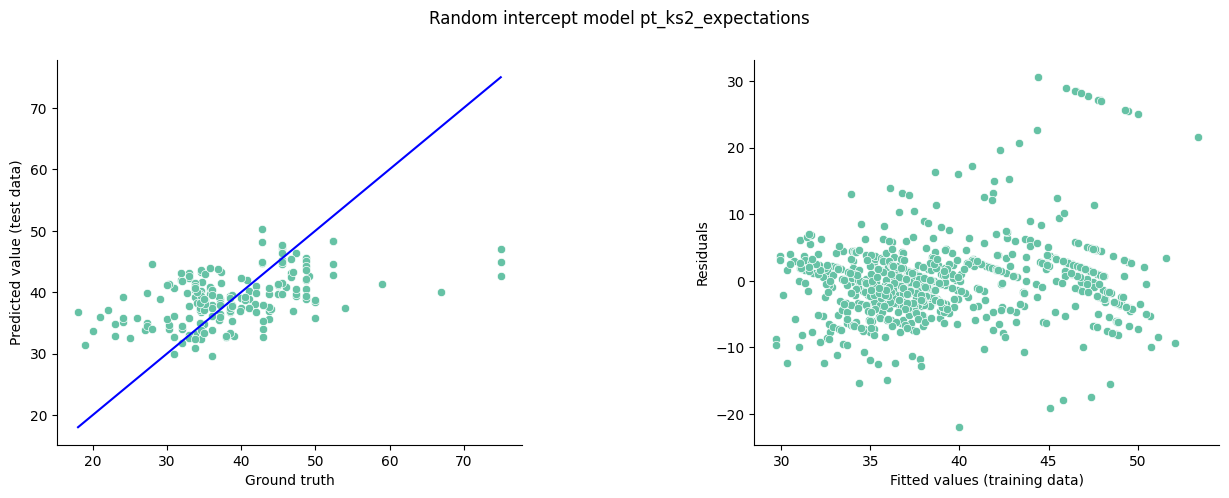

In [10]:
#fit the test values and compute evaluation metrics
predicted_vals = modelfit.predict(datatest)

#mse
mse = ((predicted_vals - datatest['pt_ks2_expectations_filled'])**2).mean()
#aic
aic = -2 * modelfit.llf + 2 * modelfit.df_modelwc
print(f"AIC: {aic}, MSE: {mse: .2f}, RMSE: {np.sqrt(mse)}, RMSE / std dev.: {np.sqrt(mse)/ np.std(datatest['pt_ks2_expectations_filled'])}")


#visualise test performance and residuals
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5), gridspec_kw={'wspace': 0.5})
sns.scatterplot(x = datatest['pt_ks2_expectations_filled'], y = predicted_vals, ax = axes[0])
min_val = datatest['pt_ks2_expectations_filled'].min()
max_val = datatest['pt_ks2_expectations_filled'].max()
axes[0].set_xlabel("Ground truth")
axes[0].set_ylabel("Predicted value (test data)")
axes[0].plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='-')

sns.despine()

sns.scatterplot(y = modelfit.resid, x = modelfit.fittedvalues, ax = axes[1])
sns.despine()
axes[1].set_ylabel("Residuals")
axes[1].set_xlabel("Fitted values (training data)")
fig.suptitle("Random intercept model pt_ks2_expectations")
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


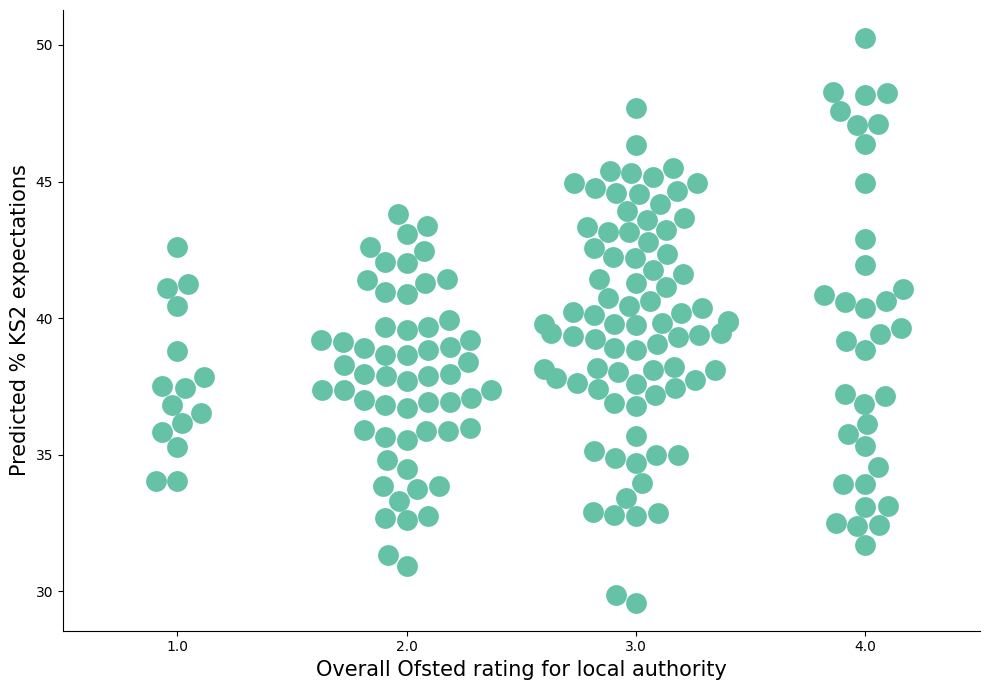

In [11]:
sns.set_palette("Set2")
plt.figure(figsize = (10,7))
sns.swarmplot(x = datatest.ofsted_overall_filled, y = predicted_vals, size = 15)
sns.despine()

plt.xlabel("Overall Ofsted rating for local authority", fontsize = 15)
plt.ylabel("Predicted % KS2 expectations", fontsize = 15)

plt.tight_layout()

Random intercept model for the pt_convicted

In [12]:
model = smf.mixedlm("pt_convictions_filled ~ pt_private_provis_filled + pt_placed_inside_la_filled + number_in_care_filled + per_child_spend +reporting_year +ofsted_overall_filled+ ofsted_leaders_filled +ofsted_care_filled+ pt_3_more_placemts_filled+ofsted_help_protection_filled", data, groups = data['la_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                  MixedLM      Dependent Variable:      pt_convictions_filled
No. Observations:       750          Method:                  REML                 
No. Groups:             150          Scale:                   3.4332               
Min. group size:        5            Log-Likelihood:          -1638.9246           
Max. group size:        5            Converged:               Yes                  
Mean group size:        5.0                                                        
-----------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z|  [0.025  0.975] 
-----------------------------------------------------------------------------------
Intercept                            802.757  113.655  7.063 0.000 579.997 1025.517
ofsted_overall_filled[T.2.0]          -1.008    1.754 -0.575 0.565  -4.446    2.429
ofsted_overall_filled[T.3.0]          -2.034    1.969 -1.033 0.302  -5.892    1.825
ofsted_overall_filled[T.4.0]          -1.003    2.164 -0.463 0.643  -5.243    3.238
ofsted_leaders_filled[T.2.0]           0.377    1.004  0.375 0.707  -1.591    2.345
ofsted_leaders_filled[T.3.0]           0.325    1.205  0.270 0.787  -2.037    2.687
ofsted_leaders_filled[T.4.0]          -0.561    1.342 -0.418 0.676  -3.192    2.070
ofsted_care_filled[T.2.0]              1.152    1.064  1.083 0.279  -0.933    3.237
ofsted_care_filled[T.3.0]              1.189    1.182  1.006 0.314  -1.127    3.505
ofsted_care_filled[T.4.0]              1.316    1.329  0.990 0.322  -1.288    3.920
ofsted_help_protection_filled[T.2.0]  -0.043    1.385 -0.031 0.975  -2.758    2.672
ofsted_help_protection_filled[T.3.0]   0.833    1.479  0.563 0.573  -2.065    3.731
ofsted_help_protection_filled[T.4.0]   1.270    1.611  0.789 0.430  -1.887    4.427
pt_private_provis_filled              -0.023    0.011 -2.078 0.038  -0.044   -0.001
pt_placed_inside_la_filled            -0.035    0.011 -3.256 0.001  -0.057   -0.014
number_in_care_filled                  0.001    0.000  1.498 0.134  -0.000    0.001
per_child_spend                       -0.008    0.007 -1.160 0.246  -0.020    0.005
reporting_year                        -0.395    0.056 -7.006 0.000  -0.505   -0.284
pt_3_more_placemts_filled             -0.020    0.029 -0.699 0.484  -0.077    0.037
Group Var                              2.006    0.200                              
===================================================================================

"""

AIC: 3317.8492027848833, MSE:  5.20, RMSE: 2.2794889044929634, RMSE / std dev.: 0.9419319872487735


<ipython-input-13-f4bd34635f07>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


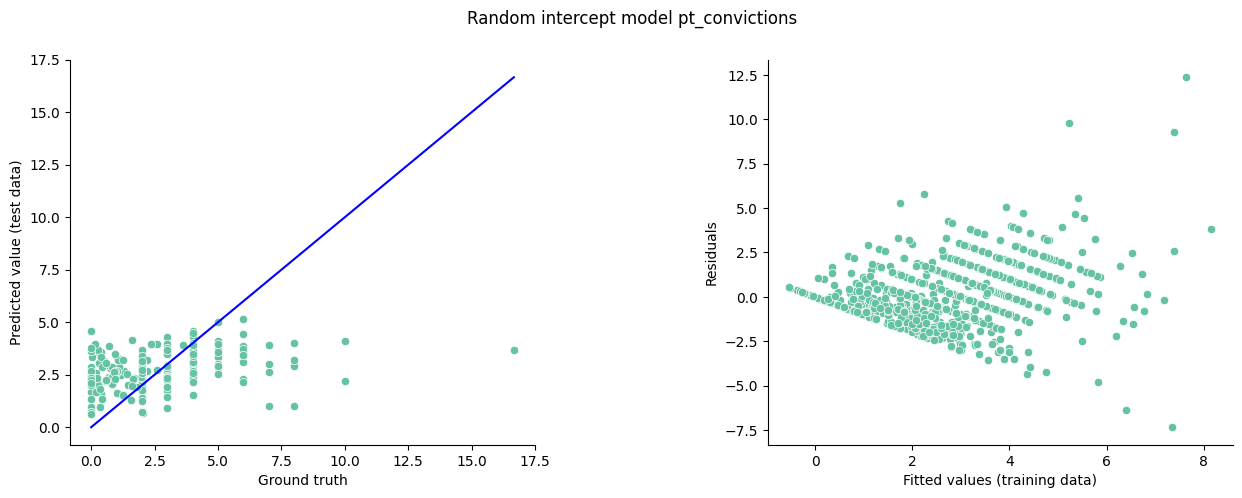

In [13]:
#fit the test values and compute evaluation metrics
predicted_vals = modelfit.predict(datatest)
#mse
mse = ((predicted_vals - datatest['pt_convictions_filled'])**2).mean()
#aic
aic = -2 * modelfit.llf + 2 * modelfit.df_modelwc
print(f"AIC: {aic}, MSE: {mse: .2f}, RMSE: {np.sqrt(mse)}, RMSE / std dev.: {np.sqrt(mse) / np.std(datatest['pt_convictions_filled'])}")


#visualise test performance and residuals
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5), gridspec_kw={'wspace': 0.5})
sns.scatterplot(x = datatest['pt_convictions_filled'], y = predicted_vals, ax = axes[0])
min_val = datatest['pt_convictions_filled'].min()
max_val = datatest['pt_convictions_filled'].max()
axes[0].set_xlabel("Ground truth")
axes[0].set_ylabel("Predicted value (test data)")
axes[0].plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='-')

sns.despine()

sns.scatterplot(y = modelfit.resid, x = modelfit.fittedvalues, ax = axes[1])
sns.despine()
axes[1].set_ylabel("Residuals")
axes[1].set_xlabel("Fitted values (training data)")
fig.suptitle("Random intercept model pt_convictions")
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


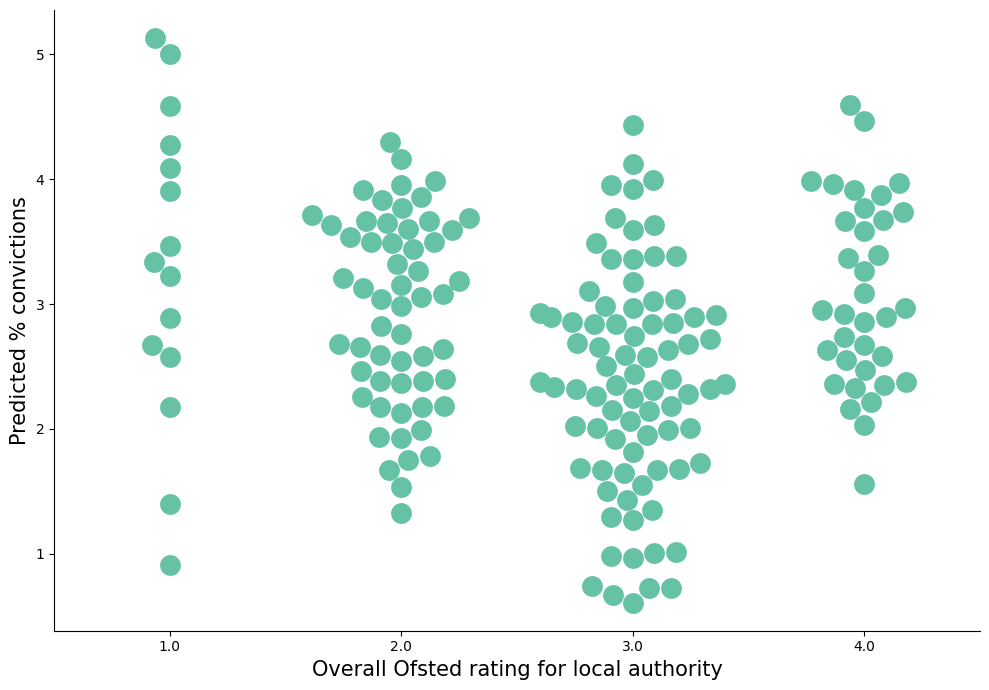

In [14]:
sns.set_palette("Set2")
plt.figure(figsize = (10,7))
sns.swarmplot(x = datatest.ofsted_overall_filled, y = predicted_vals, size = 15)
sns.despine()

plt.xlabel("Overall Ofsted rating for local authority", fontsize = 15)
plt.ylabel("Predicted % convictions", fontsize = 15)

plt.tight_layout()

Random intercept model for pt_substance

In [15]:
model = smf.mixedlm("pt_substance_filled ~ pt_private_provis_filled + pt_placed_inside_la_filled + number_in_care_filled + per_child_spend +reporting_year +ofsted_overall_filled+ ofsted_leaders_filled +ofsted_care_filled+ pt_3_more_placemts_filled+ofsted_help_protection_filled", data, groups = data['la_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                  MixedLM       Dependent Variable:       pt_substance_filled
No. Observations:       750           Method:                   REML               
No. Groups:             150           Scale:                    6.4859             
Min. group size:        5             Log-Likelihood:           -1899.3768         
Max. group size:        5             Converged:                Yes                
Mean group size:        5.0                                                        
-----------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z|  [0.025  0.975] 
-----------------------------------------------------------------------------------
Intercept                            893.111  161.363  5.535 0.000 576.846 1209.377
ofsted_overall_filled[T.2.0]          -1.556    2.967 -0.525 0.600  -7.371    4.258
ofsted_overall_filled[T.3.0]          -3.038    3.331 -0.912 0.362  -9.566    3.490
ofsted_overall_filled[T.4.0]          -0.704    3.662 -0.192 0.848  -7.881    6.474
ofsted_leaders_filled[T.2.0]          -1.762    1.698 -1.038 0.299  -5.091    1.567
ofsted_leaders_filled[T.3.0]           0.551    2.038  0.270 0.787  -3.444    4.547
ofsted_leaders_filled[T.4.0]           0.294    2.270  0.130 0.897  -4.156    4.744
ofsted_care_filled[T.2.0]              1.662    1.799  0.924 0.356  -1.864    5.188
ofsted_care_filled[T.3.0]              1.862    1.999  0.932 0.352  -2.055    5.779
ofsted_care_filled[T.4.0]              0.199    2.247  0.089 0.929  -4.204    4.602
ofsted_help_protection_filled[T.2.0]   0.992    2.340  0.424 0.672  -3.594    5.579
ofsted_help_protection_filled[T.3.0]   0.758    2.499  0.303 0.762  -4.140    5.656
ofsted_help_protection_filled[T.4.0]  -1.031    2.722 -0.379 0.705  -6.366    4.305
pt_private_provis_filled              -0.032    0.016 -1.968 0.049  -0.064   -0.000
pt_placed_inside_la_filled            -0.047    0.017 -2.757 0.006  -0.081   -0.014
number_in_care_filled                 -0.000    0.001 -0.425 0.671  -0.002    0.001
per_child_spend                        0.045    0.010  4.543 0.000   0.025    0.064
reporting_year                        -0.440    0.080 -5.504 0.000  -0.597   -0.283
pt_3_more_placemts_filled              0.115    0.041  2.800 0.005   0.034    0.195
Group Var                              6.418    0.411                              
===================================================================================

"""

AIC: 3838.75355655788, MSE:  11.26, RMSE: 3.355019203740243, RMSE / std dev.: 0.9023738357151913


<ipython-input-16-dd6b999817a8>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


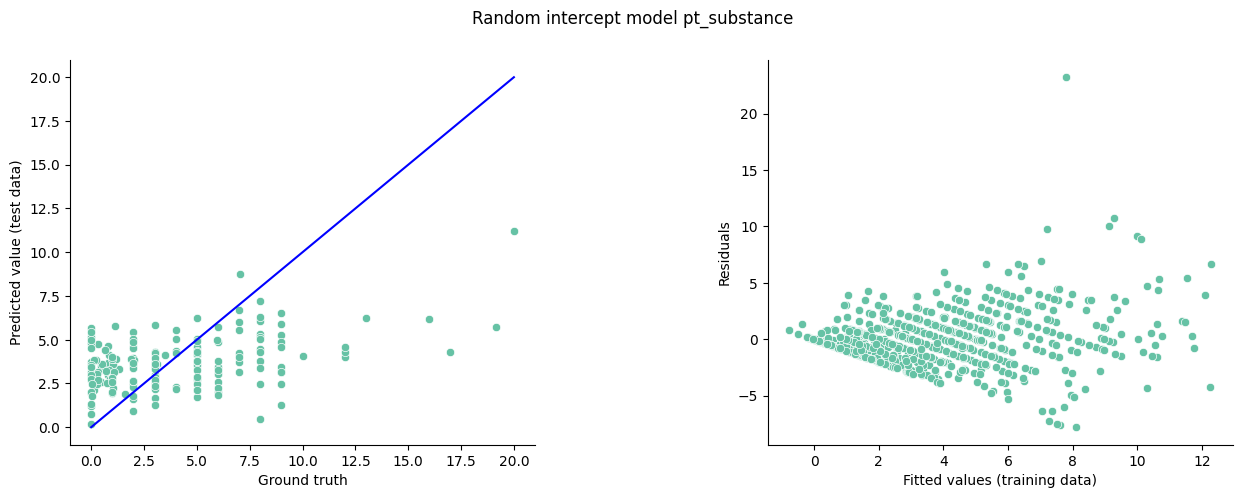

In [16]:
#fit the test values and compute evaluation metrics
predicted_vals = modelfit.predict(datatest)
#mse
mse = ((predicted_vals - datatest['pt_substance_filled'])**2).mean()
#aic
aic = -2 * modelfit.llf + 2 * modelfit.df_modelwc
print(f"AIC: {aic}, MSE: {mse: .2f}, RMSE: {np.sqrt(mse)}, RMSE / std dev.: {np.sqrt(mse) / np.std(datatest['pt_substance_filled'])}")


#visualise test performance and residuals
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5), gridspec_kw={'wspace': 0.5})
sns.scatterplot(x = datatest['pt_substance_filled'], y = predicted_vals, ax = axes[0])
min_val = datatest['pt_substance_filled'].min()
max_val = datatest['pt_substance_filled'].max()
axes[0].set_xlabel("Ground truth")
axes[0].set_ylabel("Predicted value (test data)")
axes[0].plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='-')

sns.despine()

sns.scatterplot(y = modelfit.resid, x = modelfit.fittedvalues, ax = axes[1])
sns.despine()
axes[1].set_ylabel("Residuals")
axes[1].set_xlabel("Fitted values (training data)")
fig.suptitle("Random intercept model pt_substance")
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


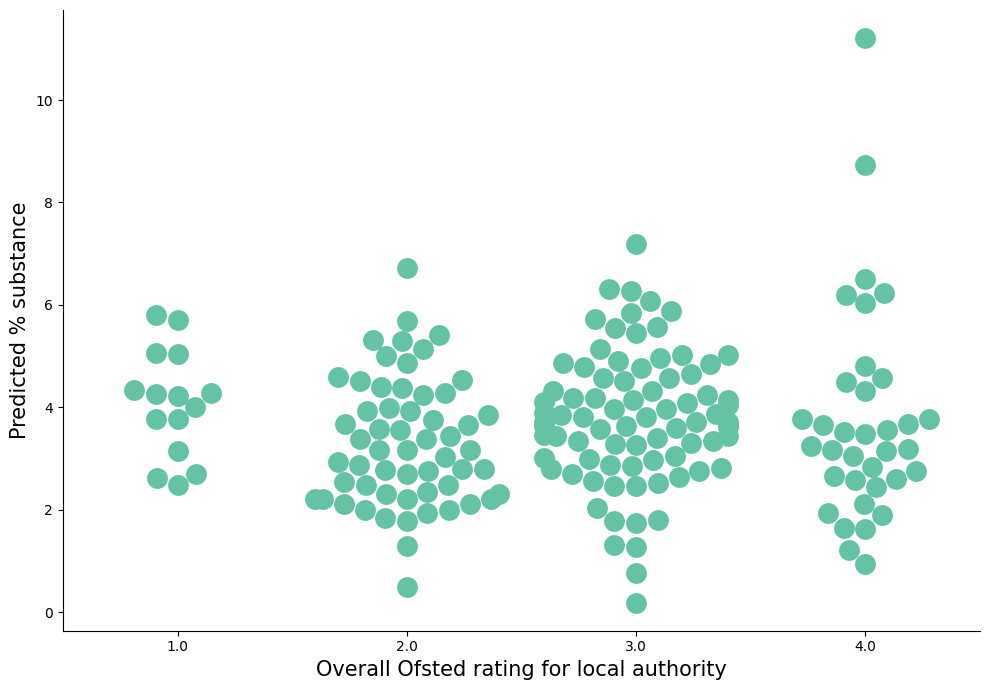

In [17]:
sns.set_palette("Set2")
plt.figure(figsize = (10,7))
sns.swarmplot(x = datatest.ofsted_overall_filled, y = predicted_vals, size = 15)
sns.despine()

plt.xlabel("Overall Ofsted rating for local authority", fontsize = 15)
plt.ylabel("Predicted % substance", fontsize = 15)

plt.tight_layout()


## Random intercept models on original data

KS4 expectations

In [18]:
trainmask = (datatrain.pt_ks4_expectations.notnull()) & (datatrain.ofsted_overall.notnull()) & (datatrain.ofsted_care.notnull())  & (datatrain.ofsted_leaders.notnull())  & (datatrain.ofsted_help_protection.notnull()) & (datatrain.pt_3_more_placemts.notnull())  & (datatrain.budget_per_child.notnull()) &  (datatrain.pt_private_provis.notnull())  & (datatrain.pt_placed_inside_la.notnull())
model = smf.mixedlm("pt_ks4_expectations ~ number_in_care+reporting_year +ofsted_overall +ofsted_care+ofsted_help_protection +ofsted_leaders+ pt_3_more_placemts +budget_per_child +pt_private_provis+pt_placed_inside_la", datatrain[trainmask], groups = datatrain[trainmask]['la_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
==============================================================================
Model:                 MixedLM     Dependent Variable:     pt_ks4_expectations
No. Observations:      61          Method:                 REML               
No. Groups:            61          Scale:                  14.5239            
Min. group size:       1           Log-Likelihood:         -168.6227          
Max. group size:       1           Converged:              Yes                
Mean group size:       1.0                                                    
------------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------------------
Intercept                     276.122 1333.066  0.207 0.836 -2336.639 2888.883
ofsted_overall[T.2.0]         -14.427    8.706 -1.657 0.097   -31.491    2.637
ofsted_overall[T.3.0]         -17.111    9.864 -1.735 0.083   -36.443    2.222
ofsted_overall[T.4.0]         -14.971   11.744 -1.275 0.202   -37.989    8.047
ofsted_care[T.2.0]              5.174    4.667  1.109 0.268    -3.973   14.321
ofsted_care[T.3.0]              9.864    5.377  1.835 0.067    -0.674   20.403
ofsted_care[T.4.0]              5.201    7.559  0.688 0.491    -9.615   20.016
ofsted_help_protection[T.2.0]  19.670    7.538  2.609 0.009     4.894   34.445
ofsted_help_protection[T.3.0]  19.908    8.004  2.487 0.013     4.221   35.595
ofsted_help_protection[T.4.0]  16.931    8.950  1.892 0.059    -0.611   34.472
ofsted_leaders[T.2.0]         -10.839    4.564 -2.375 0.018   -19.784   -1.895
ofsted_leaders[T.3.0]         -12.504    5.599 -2.233 0.026   -23.477   -1.531
ofsted_leaders[T.4.0]          -6.928    6.843 -1.012 0.311   -20.340    6.485
number_in_care                 -0.003    0.003 -1.358 0.175    -0.009    0.002
reporting_year                 -0.114    0.659 -0.173 0.863    -1.406    1.178
pt_3_more_placemts             -1.036    0.354 -2.929 0.003    -1.729   -0.343
budget_per_child               -0.050    0.067 -0.744 0.457    -0.181    0.082
pt_private_provis              -0.055    0.105 -0.525 0.599    -0.262    0.151
pt_placed_inside_la            -0.092    0.087 -1.064 0.287    -0.262    0.078
Group Var                      19.000                                         
==============================================================================

"""

In [19]:
testmask = (datatest.pt_ks4_expectations.notnull()) & (datatest.ofsted_overall.notnull()) & (datatest.ofsted_care.notnull())  & (datatest.ofsted_leaders.notnull())  & (datatest.ofsted_help_protection.notnull()) & (datatest.pt_3_more_placemts.notnull())  & (datatest.budget_per_child.notnull()) &  (datatest.pt_private_provis.notnull())  & (datatest.pt_placed_inside_la.notnull())
predicted_vals = modelfit.predict(datatest[testmask])
#mse
mse = ((predicted_vals - datatest[testmask]['pt_ks4_expectations'])**2).mean()
mse, np.sqrt(mse)

(81.77826402299146, 9.043133528981615)

KS2 expectations

In [20]:
trainmask = (datatrain.pt_ks2_expectations.notnull()) & (datatrain.ofsted_overall.notnull()) & (datatrain.ofsted_care.notnull())  & (datatrain.ofsted_leaders.notnull())  & (datatrain.ofsted_help_protection.notnull()) & (datatrain.pt_3_more_placemts.notnull())  & (datatrain.budget_per_child.notnull()) &  (datatrain.pt_private_provis.notnull())  & (datatrain.pt_placed_inside_la.notnull())
model = smf.mixedlm("pt_ks2_expectations ~ number_in_care+reporting_year +ofsted_overall +ofsted_care+ofsted_help_protection +ofsted_leaders+ pt_3_more_placemts +budget_per_child +pt_private_provis+pt_placed_inside_la", datatrain[trainmask], groups = datatrain[trainmask]['la_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
===============================================================================================
Model:                      MixedLM           Dependent Variable:           pt_ks2_expectations
No. Observations:           40                Method:                       REML               
No. Groups:                 40                Scale:                        33.9491            
Min. group size:            1                 Log-Likelihood:               -86.6093           
Max. group size:            1                 Converged:                    Yes                
Mean group size:            1.0                                                                
-----------------------------------------------------------------------------------------------
                                Coef.      Std.Err.     z    P>|z|     [0.025         0.975]   
-----------------------------------------------------------------------------------------------
Intercept                       4284.003     2550.186  1.680 0.093       -714.271      9282.276
ofsted_overall[T.2.0]          40085.349 82261558.927  0.000 1.000 -161189607.460 161269778.158
ofsted_overall[T.3.0]          40089.686 82261558.927  0.000 1.000 -161189603.123 161269782.495
ofsted_overall[T.4.0]          40076.787 82261558.927  0.000 1.000 -161189616.022 161269769.596
ofsted_care[T.2.0]                12.394        9.977  1.242 0.214         -7.160        31.948
ofsted_care[T.3.0]                 2.739       11.061  0.248 0.804        -18.941        24.419
ofsted_care[T.4.0]                 5.509       13.072  0.421 0.673        -20.113        31.130
ofsted_help_protection[T.2.0] -40076.141 82261558.927 -0.000 1.000 -161269768.950 161189616.668
ofsted_help_protection[T.3.0] -40066.459 82261558.927 -0.000 1.000 -161269759.268 161189626.350
ofsted_help_protection[T.4.0] -40082.036 82261558.927 -0.000 1.000 -161269774.845 161189610.773
ofsted_leaders[T.2.0]            -13.902       12.415 -1.120 0.263        -38.236        10.432
ofsted_leaders[T.3.0]            -15.885       13.991 -1.135 0.256        -43.307        11.538
ofsted_leaders[T.4.0]             -4.802       15.841 -0.303 0.762        -35.850        26.246
number_in_care                    -0.009        0.005 -1.920 0.055         -0.018         0.000
reporting_year                    -2.107        1.263 -1.668 0.095         -4.583         0.369
pt_3_more_placemts                 0.351        0.678  0.518 0.605         -0.978         1.680
budget_per_child                  -0.064        0.150 -0.428 0.669         -0.358         0.230
pt_private_provis                  0.372        0.246  1.513 0.130         -0.110         0.855
pt_placed_inside_la                0.036        0.213  0.170 0.865         -0.381         0.454
Group Var                         33.526                                                       
===============================================================================================

"""

In [21]:
testmask = (datatest.pt_ks2_expectations.notnull()) & (datatest.ofsted_overall.notnull()) & (datatest.ofsted_care.notnull())  & (datatest.ofsted_leaders.notnull())  & (datatest.ofsted_help_protection.notnull()) & (datatest.pt_3_more_placemts.notnull())  & (datatest.budget_per_child.notnull()) &  (datatest.pt_private_provis.notnull())  & (datatest.pt_placed_inside_la.notnull())
predicted_vals = modelfit.predict(datatest[testmask])
#mse
mse = ((predicted_vals - datatest[testmask]['pt_ks2_expectations'])**2).mean()
mse, np.sqrt(mse)

(222.1163187447315, 14.903567316073406)

Substance misuse

In [22]:
trainmask = (datatrain.pt_substance.notnull()) & (datatrain.ofsted_overall.notnull()) & (datatrain.ofsted_care.notnull())  & (datatrain.ofsted_leaders.notnull())  & (datatrain.ofsted_help_protection.notnull()) & (datatrain.pt_3_more_placemts.notnull())  & (datatrain.budget_per_child.notnull()) &  (datatrain.pt_private_provis.notnull())  & (datatrain.pt_placed_inside_la.notnull())
model = smf.mixedlm("pt_substance ~ number_in_care+reporting_year +ofsted_overall +ofsted_care+ofsted_help_protection +ofsted_leaders+ pt_3_more_placemts +budget_per_child +pt_private_provis+pt_placed_inside_la", datatrain[trainmask], groups = datatrain[trainmask]['la_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
==============================================================================
Model:                    MixedLM       Dependent Variable:       pt_substance
No. Observations:         79            Method:                   REML        
No. Groups:               79            Scale:                    4.0017      
Min. group size:          1             Log-Likelihood:           -189.3761   
Max. group size:          1             Converged:                Yes         
Mean group size:          1.0                                                 
------------------------------------------------------------------------------
                               Coef.   Std.Err.   z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------------
Intercept                     -171.385  589.875 -0.291 0.771 -1327.519 984.749
ofsted_overall[T.2.0]            1.404    4.765  0.295 0.768    -7.935  10.743
ofsted_overall[T.3.0]            2.368    5.195  0.456 0.648    -7.814  12.551
ofsted_overall[T.4.0]            8.773    5.940  1.477 0.140    -2.869  20.414
ofsted_care[T.2.0]               0.210    2.270  0.092 0.926    -4.239   4.658
ofsted_care[T.3.0]               0.807    2.565  0.315 0.753    -4.220   5.835
ofsted_care[T.4.0]              -3.330    3.467 -0.960 0.337   -10.127   3.466
ofsted_help_protection[T.2.0]   -0.507    3.669 -0.138 0.890    -7.698   6.683
ofsted_help_protection[T.3.0]   -1.432    3.842 -0.373 0.709    -8.962   6.098
ofsted_help_protection[T.4.0]   -4.375    4.177 -1.047 0.295   -12.562   3.813
ofsted_leaders[T.2.0]           -2.645    3.555 -0.744 0.457    -9.613   4.323
ofsted_leaders[T.3.0]           -1.583    3.967 -0.399 0.690    -9.359   6.192
ofsted_leaders[T.4.0]           -2.268    4.286 -0.529 0.597   -10.668   6.133
number_in_care                  -0.002    0.001 -1.775 0.076    -0.004   0.000
reporting_year                   0.088    0.292  0.300 0.764    -0.485   0.660
pt_3_more_placemts               0.331    0.141  2.347 0.019     0.055   0.607
budget_per_child                 0.014    0.031  0.431 0.666    -0.048   0.075
pt_private_provis               -0.025    0.039 -0.624 0.533    -0.102   0.053
pt_placed_inside_la             -0.063    0.033 -1.945 0.052    -0.127   0.000
Group Var                        5.235                                        
==============================================================================

"""

In [23]:
testmask = (datatest.pt_substance.notnull()) & (datatest.ofsted_overall.notnull()) & (datatest.ofsted_care.notnull())  & (datatest.ofsted_leaders.notnull())  & (datatest.ofsted_help_protection.notnull()) & (datatest.pt_3_more_placemts.notnull())  & (datatest.budget_per_child.notnull()) &  (datatest.pt_private_provis.notnull())  & (datatest.pt_placed_inside_la.notnull())
predicted_vals = modelfit.predict(datatest[testmask])
#mse
mse = ((predicted_vals - datatest[testmask]['pt_substance'])**2).mean()
mse, np.sqrt(mse)

(13.290781767939288, 3.6456524474967837)

Convictions

In [24]:
trainmask = (datatrain.pt_convictions.notnull()) & (datatrain.ofsted_overall.notnull()) & (datatrain.ofsted_care.notnull())  & (datatrain.ofsted_leaders.notnull())  & (datatrain.ofsted_help_protection.notnull()) & (datatrain.pt_3_more_placemts.notnull())  & (datatrain.budget_per_child.notnull()) &  (datatrain.pt_private_provis.notnull())  & (datatrain.pt_placed_inside_la.notnull())
model = smf.mixedlm("pt_convictions ~ number_in_care+reporting_year +ofsted_overall +ofsted_care+ofsted_help_protection +ofsted_leaders+ pt_3_more_placemts +budget_per_child +pt_private_provis+pt_placed_inside_la", datatrain[trainmask], groups = datatrain[trainmask]['la_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
===============================================================================
Model:                   MixedLM       Dependent Variable:       pt_convictions
No. Observations:        58            Method:                   REML          
No. Groups:              58            Scale:                    2.0847        
Min. group size:         1             Log-Likelihood:           -101.3067     
Max. group size:         1             Converged:                Yes           
Mean group size:         1.0                                                   
-------------------------------------------------------------------------------
                                Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
-------------------------------------------------------------------------------
Intercept                       460.539  464.016  0.993 0.321 -448.915 1369.993
ofsted_overall[T.2.0]          3739.447                                        
ofsted_overall[T.3.0]          3738.589                                        
ofsted_overall[T.4.0]          3737.758                                        
ofsted_care[T.2.0]                1.829    1.966  0.930 0.352   -2.024    5.682
ofsted_care[T.3.0]                1.348    2.199  0.613 0.540   -2.961    5.657
ofsted_care[T.4.0]                0.040    2.985  0.013 0.989   -5.811    5.891
ofsted_help_protection[T.2.0]    -1.556    2.658 -0.586 0.558   -6.765    3.653
ofsted_help_protection[T.3.0]    -1.714    2.857 -0.600 0.549   -7.313    3.885
ofsted_help_protection[T.4.0]    -1.472    3.244 -0.454 0.650   -7.832    4.887
ofsted_leaders[T.2.0]         -3740.950                                        
ofsted_leaders[T.3.0]         -3739.087                                        
ofsted_leaders[T.4.0]         -3737.796                                        
number_in_care                    0.000    0.001  0.425 0.671   -0.001    0.002
reporting_year                   -0.226    0.230 -0.981 0.326   -0.676    0.225
pt_3_more_placemts                0.261    0.116  2.262 0.024    0.035    0.488
budget_per_child                  0.006    0.027  0.203 0.839   -0.048    0.059
pt_private_provis                -0.053    0.033 -1.609 0.108   -0.117    0.011
pt_placed_inside_la              -0.046    0.028 -1.644 0.100   -0.101    0.009
Group Var                         2.297                                        
===============================================================================

"""

In [25]:
testmask = (datatest.pt_convictions.notnull()) & (datatest.ofsted_overall.notnull()) & (datatest.ofsted_care.notnull())  & (datatest.ofsted_leaders.notnull())  & (datatest.ofsted_help_protection.notnull()) & (datatest.pt_3_more_placemts.notnull())  & (datatest.budget_per_child.notnull()) &  (datatest.pt_private_provis.notnull())  & (datatest.pt_placed_inside_la.notnull()) &(datatest.la_name != 'Doncaster')
#remove doncaster as its a big anomaly that's throwing off mse results
predicted_vals = modelfit.predict(datatest[testmask])
#mse
mse = ((predicted_vals - datatest[testmask]['pt_convictions'])**2).mean()
mse, np.sqrt(mse)

(5.739670245684985, 2.3957608907578787)

## Random intercept models: Grouping by region

Modelling on filled data

KS4 expectations

In [26]:
model = smf.mixedlm("pt_ks4_expectations_filled ~ number_in_care +reporting_year +ofsted_overall_filled +ofsted_care_filled+ofsted_leaders_filled +ofsted_help_protection_filled + pt_3_more_placemts_filled +per_child_spend", data, groups = data['region_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Mixed Linear Model Regression Results
========================================================================================
Model:                  MixedLM      Dependent Variable:      pt_ks4_expectations_filled
No. Observations:       750          Method:                  REML                      
No. Groups:             10           Scale:                   42.2337                   
Min. group size:        45           Log-Likelihood:          -2467.4478                
Max. group size:        115          Converged:               Yes                       
Mean group size:        75.0                                                            
----------------------------------------------------------------------------------------
                                       Coef.   Std.Err.   z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------------------------
Intercept                            -3257.896  369.074 -8.827 0.000 -3981.269 -2534.524
ofsted_overall_filled[T.2.0]            -1.274    3.280 -0.389 0.698    -7.704     5.155
ofsted_overall_filled[T.3.0]             2.092    3.730  0.561 0.575    -5.218     9.402
ofsted_overall_filled[T.4.0]             5.760    4.041  1.426 0.154    -2.159    13.680
ofsted_care_filled[T.2.0]                0.835    1.960  0.426 0.670    -3.006     4.676
ofsted_care_filled[T.3.0]                0.238    2.171  0.109 0.913    -4.017     4.493
ofsted_care_filled[T.4.0]               -1.014    2.431 -0.417 0.677    -5.779     3.751
ofsted_leaders_filled[T.2.0]             0.471    1.825  0.258 0.796    -3.106     4.049
ofsted_leaders_filled[T.3.0]            -3.044    2.254 -1.350 0.177    -7.461     1.374
ofsted_leaders_filled[T.4.0]            -4.386    2.480 -1.769 0.077    -9.246     0.474
ofsted_help_protection_filled[T.2.0]     0.724    2.562  0.283 0.777    -4.297     5.745
ofsted_help_protection_filled[T.3.0]     1.220    2.770  0.441 0.660    -4.208     6.649
ofsted_help_protection_filled[T.4.0]    -1.108    2.988 -0.371 0.711    -6.965     4.749
number_in_care                          -0.003    0.001 -3.972 0.000    -0.005    -0.002
reporting_year                           1.627    0.183  8.899 0.000     1.268     1.985
pt_3_more_placemts_filled               -0.194    0.081 -2.396 0.017    -0.352    -0.035
per_child_spend                          0.006    0.017  0.368 0.713    -0.026     0.039
Group Var                                2.856    0.264                                 
========================================================================================

"""

AIC:  4970.90
                          squared_error
region_name                            
East of England               12.137151
East Midlands                 13.053032
North East                    17.160001
North West                    20.324234
South West                    26.740633
Outer London                  27.220080
Yorkshire and The Humber      30.617986
West Midlands                 37.472479
South East                    49.424252
Inner London                  75.039149


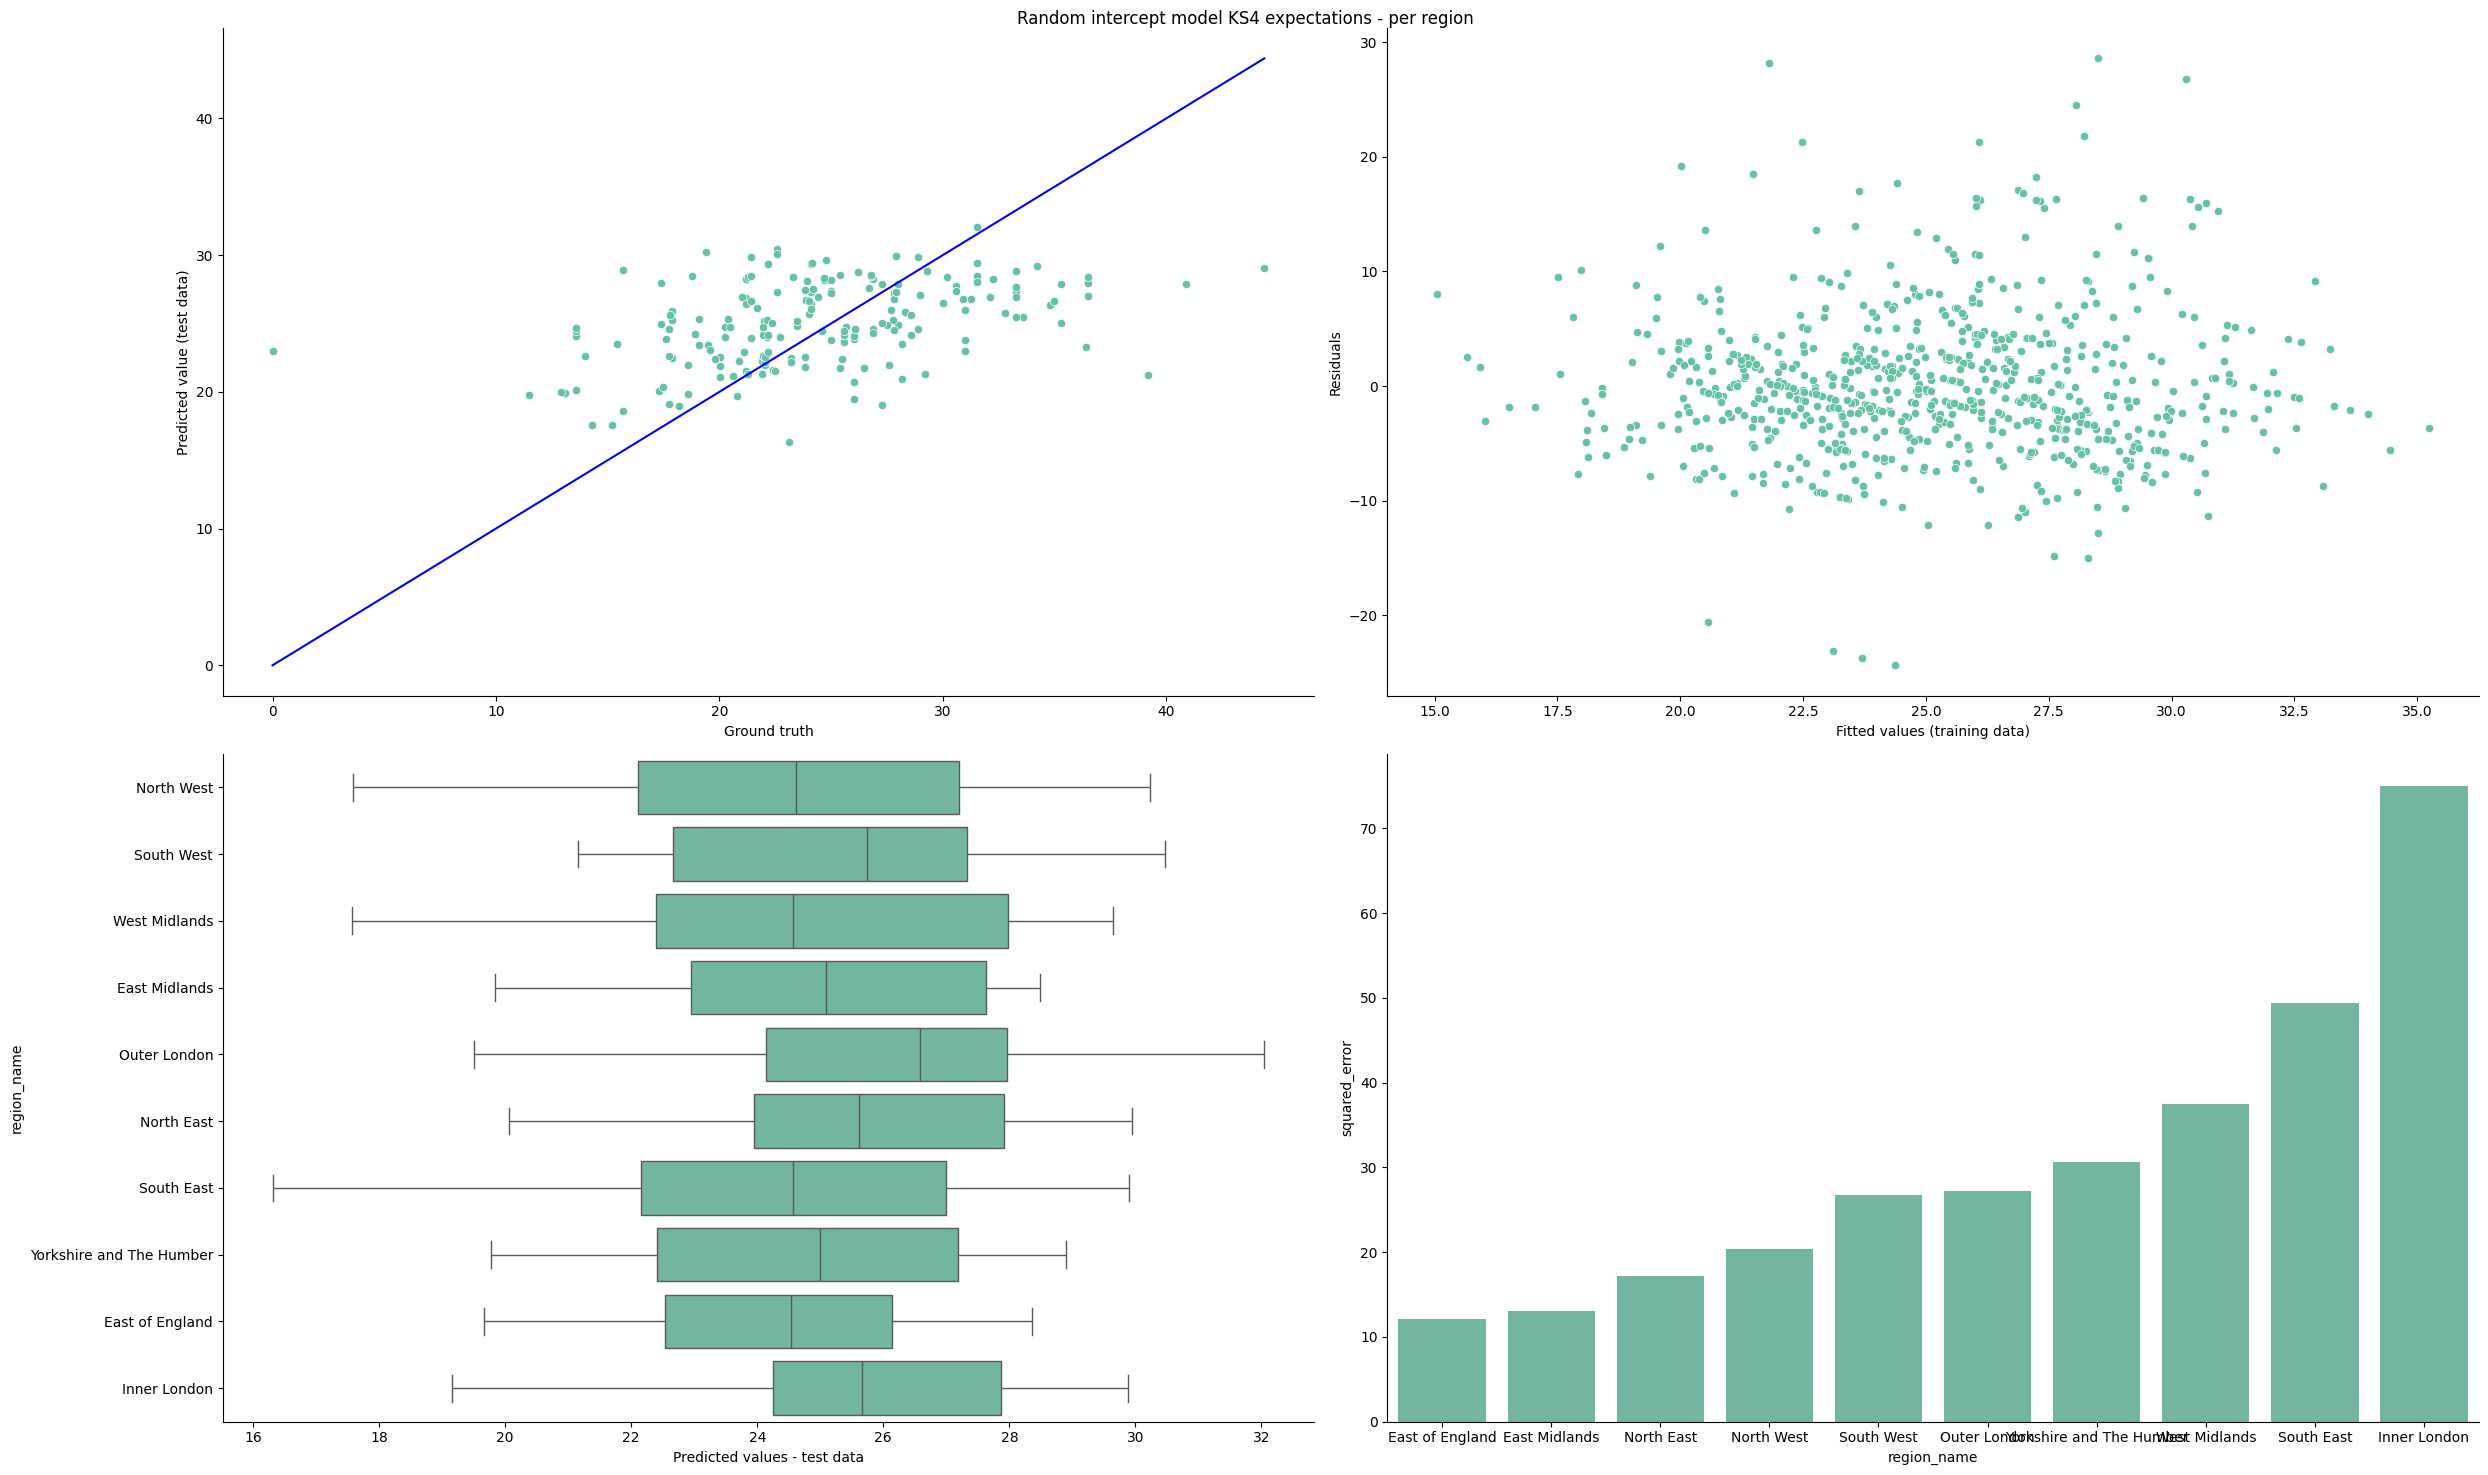

In [27]:
#fit the test values and compute evaluation metrics

predicted_vals = modelfit.predict(datatest)
#mse

#aic
aic = -2 * modelfit.llf + 2 * modelfit.df_modelwc
print(f"AIC: {aic: .2f}")

#visualise test performance and residuals
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (25,15))

#plot fitted vs ground truth
sns.scatterplot(x = datatest['pt_ks4_expectations_filled'], y = predicted_vals, ax = axes[0,0])
min_val = datatest['pt_ks4_expectations_filled'].min()
max_val =datatest['pt_ks4_expectations_filled'].max()
axes[0,0].set_xlabel("Ground truth")
axes[0,0].set_ylabel("Predicted value (test data)")
axes[0,0].plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='-')

sns.despine()

#plot residuals vs fitted
sns.scatterplot(y = modelfit.resid, x = modelfit.fittedvalues, ax = axes[0,1])
sns.despine()
axes[0,1].set_ylabel("Residuals")
axes[0,1].set_xlabel("Fitted values (training data)")

#plot box plot of predictions for each group
sns.boxplot(x=predicted_vals, y = datatest['region_name'], ax = axes[1,0])

axes[1,0].set_xlabel("Predicted values - test data")


#calculate mse per region
results_data = pd.DataFrame({'predicted_vals': predicted_vals, 'region_name': datatest['region_name'], 'ground_truth': datatest['pt_ks4_expectations_filled']})
results_data['squared_error'] = (results_data['ground_truth'] - results_data['predicted_vals'])**2
mse_per_region = results_data[['squared_error', 'region_name']].groupby('region_name').mean().sort_values(by= 'squared_error')
print(mse_per_region)
sns.barplot(x ='region_name', y='squared_error', data = mse_per_region, ax = axes[1,1])

fig.suptitle("Random intercept model KS4 expectations - per region")
plt.tight_layout()

KS2 expecations

In [28]:
model = smf.mixedlm("pt_ks2_expectations_filled ~ number_in_care+reporting_year +ofsted_overall_filled +ofsted_care_filled+ofsted_leaders_filled +ofsted_help_protection_filled + pt_3_more_placemts_filled +per_child_spend", data, groups = data['region_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
====================================================================================
Model:                MixedLM     Dependent Variable:     pt_ks2_expectations_filled
No. Observations:     750         Method:                 REML                      
No. Groups:           10          Scale:                  40.8685                   
Min. group size:      45          Log-Likelihood:         -2465.9234                
Max. group size:      115         Converged:              Yes                       
Mean group size:      75.0                                                          
------------------------------------------------------------------------------------
                                      Coef.   Std.Err.   z    P>|z|  [0.025  0.975] 
------------------------------------------------------------------------------------
Intercept                            1016.582  364.133  2.792 0.005 302.895 1730.268
ofsted_overall_filled[T.2.0]            1.238    3.263  0.380 0.704  -5.156    7.633
ofsted_overall_filled[T.3.0]            2.084    3.718  0.561 0.575  -5.203    9.371
ofsted_overall_filled[T.4.0]            3.575    4.015  0.890 0.373  -4.294   11.444
ofsted_care_filled[T.2.0]              -0.119    1.942 -0.061 0.951  -3.925    3.687
ofsted_care_filled[T.3.0]               0.454    2.148  0.211 0.833  -3.757    4.665
ofsted_care_filled[T.4.0]              -0.366    2.402 -0.152 0.879  -5.074    4.342
ofsted_leaders_filled[T.2.0]           -0.990    1.809 -0.547 0.584  -4.535    2.555
ofsted_leaders_filled[T.3.0]           -2.061    2.249 -0.917 0.359  -6.469    2.347
ofsted_leaders_filled[T.4.0]           -2.055    2.469 -0.832 0.405  -6.895    2.785
ofsted_help_protection_filled[T.2.0]   -1.292    2.544 -0.508 0.611  -6.278    3.693
ofsted_help_protection_filled[T.3.0]   -1.246    2.758 -0.452 0.651  -6.652    4.160
ofsted_help_protection_filled[T.4.0]   -2.855    2.969 -0.962 0.336  -8.675    2.964
number_in_care                         -0.002    0.001 -3.078 0.002  -0.004   -0.001
reporting_year                         -0.483    0.180 -2.676 0.007  -0.836   -0.129
pt_3_more_placemts_filled              -0.107    0.080 -1.342 0.180  -0.264    0.050
per_child_spend                         0.010    0.017  0.588 0.556  -0.023    0.043
Group Var                              35.131    2.666                              
====================================================================================

"""

Substance misuse

In [29]:
model = smf.mixedlm("pt_substance_filled ~ number_in_care+reporting_year +ofsted_overall_filled +ofsted_care_filled+ofsted_leaders_filled +ofsted_help_protection_filled + pt_3_more_placemts_filled +per_child_spend", data, groups = data['region_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                  MixedLM       Dependent Variable:       pt_substance_filled
No. Observations:       750           Method:                   REML               
No. Groups:             10            Scale:                    11.8454            
Min. group size:        45            Log-Likelihood:           -2002.5363         
Max. group size:        115           Converged:                Yes                
Mean group size:        75.0                                                       
-----------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z|  [0.025  0.975] 
-----------------------------------------------------------------------------------
Intercept                            743.050  195.914  3.793 0.000 359.065 1127.035
ofsted_overall_filled[T.2.0]          -1.605    1.740 -0.922 0.356  -5.016    1.806
ofsted_overall_filled[T.3.0]          -2.894    1.978 -1.464 0.143  -6.770    0.982
ofsted_overall_filled[T.4.0]          -0.832    2.141 -0.389 0.697  -5.029    3.364
ofsted_care_filled[T.2.0]              1.741    1.039  1.676 0.094  -0.295    3.777
ofsted_care_filled[T.3.0]              2.101    1.150  1.826 0.068  -0.154    4.355
ofsted_care_filled[T.4.0]              0.610    1.287  0.474 0.635  -1.912    3.132
ofsted_leaders_filled[T.2.0]          -1.682    0.968 -1.738 0.082  -3.579    0.215
ofsted_leaders_filled[T.3.0]           0.452    1.196  0.378 0.705  -1.892    2.796
ofsted_leaders_filled[T.4.0]          -0.022    1.317 -0.017 0.987  -2.602    2.558
ofsted_help_protection_filled[T.2.0]   0.770    1.360  0.566 0.571  -1.895    3.434
ofsted_help_protection_filled[T.3.0]   0.304    1.472  0.206 0.837  -2.581    3.188
ofsted_help_protection_filled[T.4.0]  -1.171    1.586 -0.739 0.460  -4.280    1.937
number_in_care                        -0.001    0.000 -2.254 0.024  -0.002   -0.000
reporting_year                        -0.367    0.097 -3.781 0.000  -0.557   -0.177
pt_3_more_placemts_filled              0.094    0.043  2.180 0.029   0.009    0.178
per_child_spend                        0.023    0.009  2.513 0.012   0.005    0.040
Group Var                              1.054    0.180                              
===================================================================================

"""

Convictions

In [30]:
model = smf.mixedlm("pt_convictions_filled ~ number_in_care+reporting_year +ofsted_overall_filled +ofsted_care_filled+ofsted_leaders_filled +ofsted_help_protection_filled + pt_3_more_placemts_filled +per_child_spend", data, groups = data['region_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
==================================================================================
Model:                 MixedLM      Dependent Variable:      pt_convictions_filled
No. Observations:      750          Method:                  REML                 
No. Groups:            10           Scale:                   4.9375               
Min. group size:       45           Log-Likelihood:          -1682.5935           
Max. group size:       115          Converged:               Yes                  
Mean group size:       75.0                                                       
----------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                            745.959  126.337  5.905 0.000 498.343 993.576
ofsted_overall_filled[T.2.0]          -0.737    1.125 -0.655 0.512  -2.943   1.469
ofsted_overall_filled[T.3.0]          -1.431    1.280 -1.118 0.263  -3.939   1.077
ofsted_overall_filled[T.4.0]          -0.478    1.385 -0.345 0.730  -3.192   2.237
ofsted_care_filled[T.2.0]              1.046    0.671  1.558 0.119  -0.270   2.362
ofsted_care_filled[T.3.0]              1.021    0.743  1.373 0.170  -0.436   2.478
ofsted_care_filled[T.4.0]              0.817    0.832  0.982 0.326  -0.813   2.448
ofsted_leaders_filled[T.2.0]           0.746    0.626  1.192 0.233  -0.481   1.972
ofsted_leaders_filled[T.3.0]           0.623    0.775  0.804 0.421  -0.895   2.141
ofsted_leaders_filled[T.4.0]          -0.278    0.852 -0.326 0.744  -1.948   1.392
ofsted_help_protection_filled[T.2.0]  -0.695    0.879 -0.790 0.430  -2.418   1.029
ofsted_help_protection_filled[T.3.0]  -0.035    0.952 -0.037 0.971  -1.902   1.832
ofsted_help_protection_filled[T.4.0]   0.364    1.027  0.354 0.723  -1.649   2.377
number_in_care                         0.000    0.000  1.839 0.066  -0.000   0.001
reporting_year                        -0.368    0.063 -5.881 0.000  -0.491  -0.245
pt_3_more_placemts_filled              0.034    0.028  1.213 0.225  -0.021   0.088
per_child_spend                       -0.010    0.006 -1.762 0.078  -0.021   0.001
Group Var                              0.537    0.135                             
==================================================================================

"""

Original data

KS4 expectations

In [31]:
mask = (data.pt_ks4_expectations.notnull()) &(data.number_in_care.notnull())& (data.ofsted_overall.notnull()) & (data.ofsted_care.notnull())  & (data.ofsted_leaders.notnull())  & (data.ofsted_help_protection.notnull()) & (data.pt_3_more_placemts.notnull())  & (data.budget_per_child.notnull()) &  (data.pt_private_provis.notnull())  & (data.pt_placed_inside_la.notnull())
model = smf.mixedlm("pt_ks4_expectations ~ number_in_care+reporting_year +ofsted_overall +ofsted_care+ofsted_help_protection +ofsted_leaders+ pt_3_more_placemts +budget_per_child +pt_private_provis+pt_placed_inside_la", data[mask], groups = data[mask]['region_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
===============================================================================
Model:                  MixedLM     Dependent Variable:     pt_ks4_expectations
No. Observations:       90          Method:                 REML               
No. Groups:             10          Scale:                  42.9349            
Min. group size:        4           Log-Likelihood:         -272.8700          
Max. group size:        18          Converged:              Yes                
Mean group size:        9.0                                                    
-------------------------------------------------------------------------------
                               Coef.   Std.Err.   z    P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------------
Intercept                     -260.015 1375.292 -0.189 0.850 -2955.538 2435.507
ofsted_overall[T.2.0]          -15.946    9.365 -1.703 0.089   -34.302    2.410
ofsted_overall[T.3.0]          -14.499   10.426 -1.391 0.164   -34.933    5.935
ofsted_overall[T.4.0]           -6.085   12.293 -0.495 0.621   -30.178   18.008
ofsted_care[T.2.0]               2.338    5.376  0.435 0.664    -8.198   12.874
ofsted_care[T.3.0]               7.070    5.927  1.193 0.233    -4.547   18.687
ofsted_care[T.4.0]               3.334    8.043  0.415 0.678   -12.431   19.099
ofsted_help_protection[T.2.0]   15.834    8.211  1.928 0.054    -0.259   31.926
ofsted_help_protection[T.3.0]   16.084    8.697  1.849 0.064    -0.961   33.130
ofsted_help_protection[T.4.0]   10.508    9.665  1.087 0.277    -8.435   29.450
ofsted_leaders[T.2.0]           -3.454    4.259 -0.811 0.417   -11.802    4.894
ofsted_leaders[T.3.0]           -8.674    5.009 -1.732 0.083   -18.491    1.144
ofsted_leaders[T.4.0]           -9.598    5.898 -1.627 0.104   -21.158    1.962
number_in_care                  -0.004    0.002 -1.584 0.113    -0.009    0.001
reporting_year                   0.146    0.681  0.215 0.830    -1.188    1.481
pt_3_more_placemts              -0.497    0.325 -1.529 0.126    -1.135    0.140
budget_per_child                 0.006    0.067  0.083 0.934    -0.125    0.137
pt_private_provis               -0.008    0.095 -0.081 0.935    -0.195    0.179
pt_placed_inside_la             -0.071    0.087 -0.817 0.414    -0.241    0.099
Group Var                        0.000    0.628                                
===============================================================================

"""

KS2 expectations

In [32]:
mask = (data.pt_ks2_expectations.notnull()) &(data.number_in_care.notnull())& (data.ofsted_overall.notnull()) & (data.ofsted_care.notnull())  & (data.ofsted_leaders.notnull())  & (data.ofsted_help_protection.notnull()) & (data.pt_3_more_placemts.notnull())  & (data.budget_per_child.notnull()) &  (data.pt_private_provis.notnull())  & (data.pt_placed_inside_la.notnull())
model = smf.mixedlm("pt_ks2_expectations ~ number_in_care+reporting_year +ofsted_overall +ofsted_care+ofsted_help_protection +ofsted_leaders+ pt_3_more_placemts +budget_per_child +pt_private_provis+pt_placed_inside_la", data[mask], groups = data[mask]['region_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 1.690418
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encoun

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
==============================================================================
Model:                 MixedLM     Dependent Variable:     pt_ks2_expectations
No. Observations:      63          Method:                 REML               
No. Groups:            10          Scale:                  68.6355            
Min. group size:       2           Log-Likelihood:         -179.4406          
Max. group size:       16          Converged:              No                 
Mean group size:       6.3                                                    
------------------------------------------------------------------------------
                                Coef.   Std.Err.   z    P>|z|  [0.025  0.975] 
------------------------------------------------------------------------------
Intercept                      4907.294 2272.896  2.159 0.031 452.500 9362.088
ofsted_overall[T.2.0]         -3723.340                                       
ofsted_overall[T.3.0]         -3717.521                                       
ofsted_overall[T.4.0]         -3727.778                                       
ofsted_care[T.2.0]                4.270    8.769  0.487 0.626 -12.917   21.457
ofsted_care[T.3.0]                0.068    9.703  0.007 0.994 -18.949   19.086
ofsted_care[T.4.0]                0.744   11.255  0.066 0.947 -21.315   22.804
ofsted_help_protection[T.2.0]  3724.054                                       
ofsted_help_protection[T.3.0]  3722.274                                       
ofsted_help_protection[T.4.0]  3717.415                                       
ofsted_leaders[T.2.0]            -5.692    8.038 -0.708 0.479 -21.447   10.063
ofsted_leaders[T.3.0]            -7.055    9.342 -0.755 0.450 -25.364   11.254
ofsted_leaders[T.4.0]             1.990   11.537  0.172 0.863 -20.622   24.603
number_in_care                   -0.002    0.004 -0.440 0.660  -0.008    0.005
reporting_year                   -2.412    1.126 -2.143 0.032  -4.619   -0.206
pt_3_more_placemts                0.597    0.610  0.979 0.328  -0.599    1.794
budget_per_child                  0.174    0.154  1.131 0.258  -0.128    0.476
pt_private_provis                -0.094    0.212 -0.446 0.656  -0.510    0.321
pt_placed_inside_la              -0.099    0.134 -0.736 0.462  -0.361    0.164
Group Var                        71.261                                       
==============================================================================

"""

Substance misuse

In [33]:
mask = (data.pt_substance.notnull()) &(data.number_in_care.notnull())& (data.ofsted_overall.notnull()) & (data.ofsted_care.notnull())  & (data.ofsted_leaders.notnull())  & (data.ofsted_help_protection.notnull()) & (data.pt_3_more_placemts.notnull())  & (data.budget_per_child.notnull()) &  (data.pt_private_provis.notnull())  & (data.pt_placed_inside_la.notnull())
model = smf.mixedlm("pt_substance~ number_in_care+reporting_year +ofsted_overall +ofsted_care+ofsted_help_protection +ofsted_leaders+ pt_3_more_placemts +budget_per_child +pt_private_provis+pt_placed_inside_la", data[mask], groups = data[mask]['region_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
=============================================================================
Model:                   MixedLM       Dependent Variable:       pt_substance
No. Observations:        116           Method:                   REML        
No. Groups:              10            Scale:                    9.8160      
Min. group size:         7             Log-Likelihood:           -290.0895   
Max. group size:         19            Converged:                Yes         
Mean group size:         11.6                                                
-----------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z|  [0.025   0.975] 
-----------------------------------------------------------------------------
Intercept                     143.069  492.600  0.290 0.771 -822.409 1108.548
ofsted_overall[T.2.0]           2.487    4.387  0.567 0.571   -6.111   11.085
ofsted_overall[T.3.0]           3.112    4.743  0.656 0.512   -6.184   12.408
ofsted_overall[T.4.0]           7.681    5.164  1.487 0.137   -2.441   17.803
ofsted_care[T.2.0]              0.285    2.240  0.127 0.899   -4.106    4.676
ofsted_care[T.3.0]              0.350    2.501  0.140 0.889   -4.553    5.252
ofsted_care[T.4.0]             -2.002    2.992 -0.669 0.503   -7.865    3.862
ofsted_help_protection[T.2.0]  -0.751    3.688 -0.204 0.839   -7.980    6.478
ofsted_help_protection[T.3.0]  -0.917    3.863 -0.237 0.812   -8.489    6.654
ofsted_help_protection[T.4.0]  -2.297    4.102 -0.560 0.576  -10.338    5.744
ofsted_leaders[T.2.0]          -2.623    2.465 -1.064 0.287   -7.454    2.208
ofsted_leaders[T.3.0]          -2.158    2.795 -0.772 0.440   -7.637    3.320
ofsted_leaders[T.4.0]          -4.138    3.039 -1.362 0.173  -10.094    1.819
number_in_care                 -0.002    0.001 -1.505 0.132   -0.004    0.000
reporting_year                 -0.069    0.244 -0.282 0.778   -0.547    0.409
pt_3_more_placemts              0.206    0.122  1.690 0.091   -0.033    0.444
budget_per_child                0.017    0.027  0.644 0.520   -0.035    0.070
pt_private_provis               0.010    0.036  0.269 0.788   -0.060    0.079
pt_placed_inside_la            -0.042    0.029 -1.467 0.142   -0.099    0.014
Group Var                       0.162    0.196                               
=============================================================================

"""

Convictions

In [34]:
mask = (data.pt_convictions.notnull())  &(data.number_in_care.notnull())&(data.ofsted_overall.notnull()) & (data.ofsted_care.notnull())  & (data.ofsted_leaders.notnull())  & (data.ofsted_help_protection.notnull()) & (data.pt_3_more_placemts.notnull())  & (data.budget_per_child.notnull()) &  (data.pt_private_provis.notnull())  & (data.pt_placed_inside_la.notnull())
model = smf.mixedlm("pt_convictions ~ number_in_care+reporting_year +ofsted_overall +ofsted_care+ofsted_help_protection +ofsted_leaders+ pt_3_more_placemts +budget_per_child +pt_private_provis+pt_placed_inside_la", data[mask], groups = data[mask]['region_name'])
modelfit = model.fit(method = ['nm'])
modelfit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
============================================================================
Model:                  MixedLM      Dependent Variable:      pt_convictions
No. Observations:       87           Method:                  REML          
No. Groups:             10           Scale:                   4.3023        
Min. group size:        4            Log-Likelihood:          -183.9975     
Max. group size:        16           Converged:               Yes           
Mean group size:        8.7                                                 
----------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z|  [0.025  0.975] 
----------------------------------------------------------------------------
Intercept                     845.367  354.044  2.388 0.017 151.453 1539.281
ofsted_overall[T.2.0]          -1.184    3.159 -0.375 0.708  -7.377    5.008
ofsted_overall[T.3.0]          -1.904    3.551 -0.536 0.592  -8.864    5.056
ofsted_overall[T.4.0]          -2.828    3.927 -0.720 0.471 -10.525    4.869
ofsted_care[T.2.0]              1.589    1.840  0.863 0.388  -2.018    5.195
ofsted_care[T.3.0]              1.029    1.994  0.516 0.606  -2.880    4.937
ofsted_care[T.4.0]              1.210    2.422  0.500 0.617  -3.537    5.958
ofsted_help_protection[T.2.0]  -2.603    2.395 -1.087 0.277  -7.296    2.090
ofsted_help_protection[T.3.0]  -2.301    2.540 -0.906 0.365  -7.279    2.678
ofsted_help_protection[T.4.0]  -1.382    2.755 -0.502 0.616  -6.782    4.018
ofsted_leaders[T.2.0]           1.073    2.114  0.508 0.612  -3.071    5.217
ofsted_leaders[T.3.0]           2.065    2.358  0.876 0.381  -2.555    6.686
ofsted_leaders[T.4.0]           2.351    2.631  0.893 0.372  -2.806    7.508
number_in_care                  0.001    0.001  0.982 0.326  -0.001    0.002
reporting_year                 -0.417    0.176 -2.375 0.018  -0.761   -0.073
pt_3_more_placemts              0.160    0.089  1.792 0.073  -0.015    0.335
budget_per_child                0.041    0.019  2.143 0.032   0.004    0.079
pt_private_provis              -0.039    0.007 -5.591 0.000  -0.053   -0.026
pt_placed_inside_la            -0.037                                       
Group Var                       0.000                                       
============================================================================

"""